<a href="https://colab.research.google.com/github/himanshu062/Financial_Risk_Prediction/blob/main/Financial_Risk_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 4]
plt.style.use("fivethirtyeight")

pd.options.display.max_rows=1000

import warnings
warnings.simplefilter('ignore')

from sklearn.model_selection import train_test_split

import re
import nltk
import spacy
import string

## **EXPLORATORY DATA ANALYSIS(EDA)**

In [122]:
def get_data():
    train = pd.read_csv('/content/Train.csv')
    test = pd.read_csv('/content/Test.csv')
    sub = pd.read_csv('/content/Sample_Submission.csv')

    print(train.shape, test.shape, sub.shape)

    return train, test, sub

In [123]:
train, test, sub = get_data()

data = pd.concat([train, test], axis=0)
data['source'] = np.nan
data['source'].iloc[:train.shape[0]] = "train"
data['source'].iloc[train.shape[0]: ] = "test"
data.drop(['IsUnderRisk'], axis=1, inplace=True)

print(data.shape)

(543, 8) (233, 7) (233, 2)
(776, 8)


In [124]:
target = 'IsUnderRisk'
train.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
0,2,8.032,14,8,3,6,0,1
1,31,77.730,8,3,3,8,1,0
2,40,59.203,3,12,11,3,0,1
3,12,73.080,4,5,7,6,0,0
4,4,15.666,13,15,6,7,2,1


In [125]:
train.nunique()

City                     43
Location_Score          540
Internal_Audit_Score     13
External_Audit_Score     13
Fin_Score                13
Loss_score               10
Past_Results              7
IsUnderRisk               2
dtype: int64

In [126]:
train.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,19.576427,32.259346,8.189687,7.327808,7.046041,5.530387,0.613260,0.626151
std,14.722687,24.887291,3.312022,3.450667,3.156978,1.839124,0.764509,0.484270
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,13.565000,6.000000,5.000000,5.000000,4.000000,0.000000,0.000000
50%,14.000000,19.803000,8.000000,7.000000,7.000000,6.000000,1.000000,1.000000
75%,37.000000,62.594000,11.000000,10.000000,8.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,15.000000,15.000000,15.000000,13.000000,10.000000,1.000000


In [127]:
test.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results
count,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000,233.000000
mean,19.343348,32.591034,7.854077,7.424893,6.957082,5.648069,0.579399
std,14.915933,25.185948,3.176584,3.525117,3.337077,1.708424,0.703382
min,0.000000,5.469000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,6.000000,12.156000,6.000000,5.000000,4.000000,4.000000,0.000000
50%,13.000000,19.968000,7.000000,7.000000,6.000000,6.000000,1.000000
75%,37.000000,62.766000,10.000000,10.000000,8.000000,7.000000,1.000000
max,41.000000,77.668000,15.000000,15.000000,15.000000,10.000000,5.000000


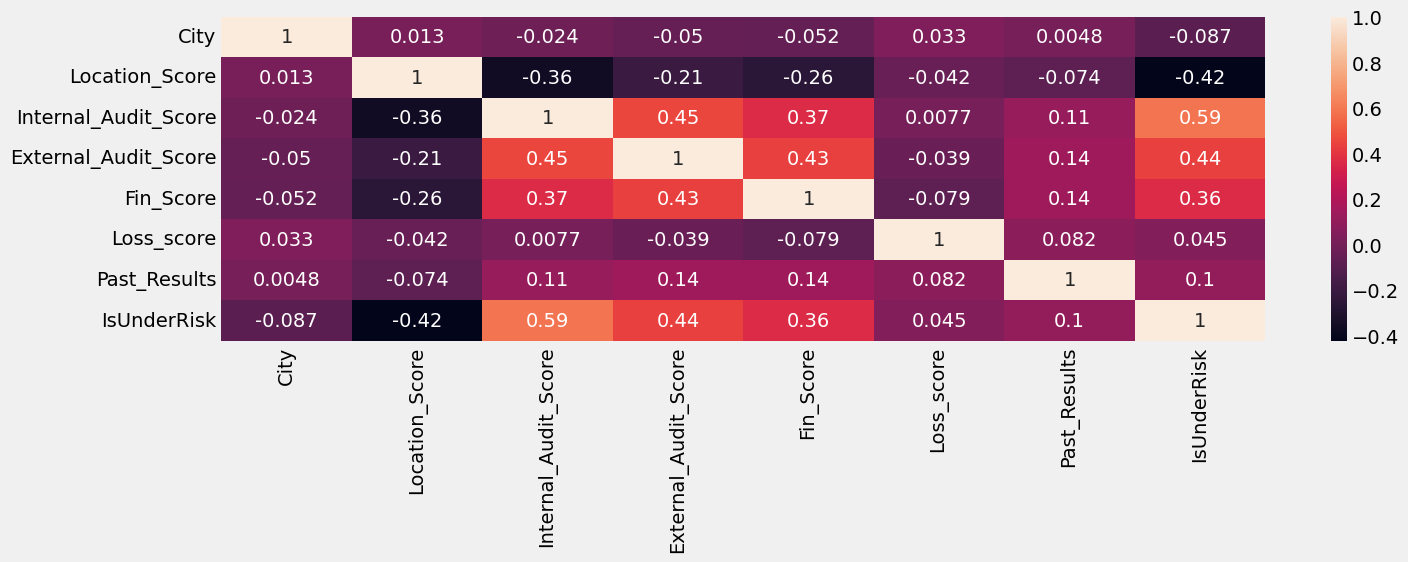

In [128]:
import seaborn as sn
import matplotlib.pyplot as plt
corr = train.corr()
sn.heatmap(corr, annot=True)
plt.show()

## Univariate

Target

<Axes: ylabel='count'>

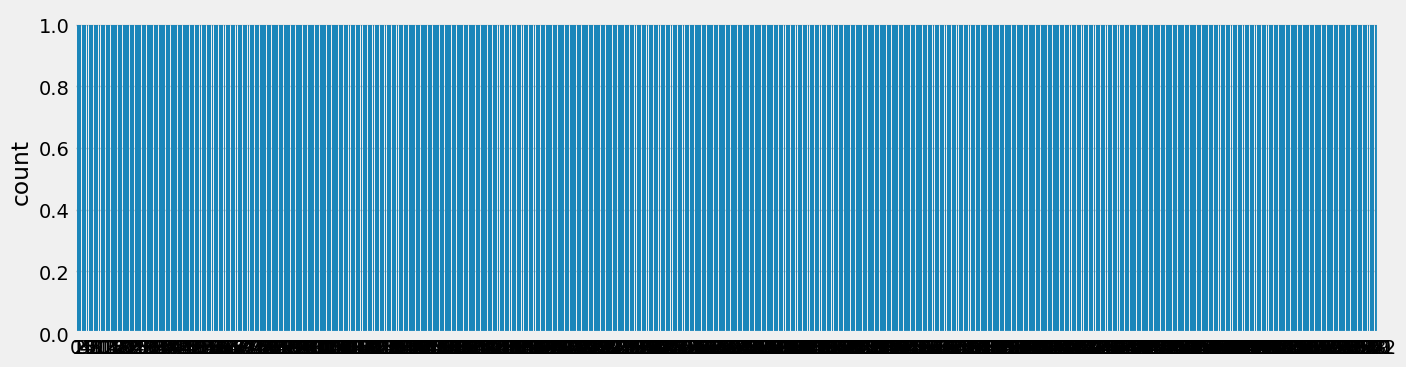

In [129]:
col = 'IsUnderRisk'

sns.countplot(train[col])

City

In [130]:
col = "City"

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train[col].nunique(), test[col].nunique(),
    len(set(test[col].unique()) - set(train[col].unique())), set(test[col].unique()) - set(train[col].unique())
))

Train Unique : 43
Test Unique :  34
Test - Train : 2 -- [{34, 36}]


<Axes: xlabel='value', ylabel='count'>

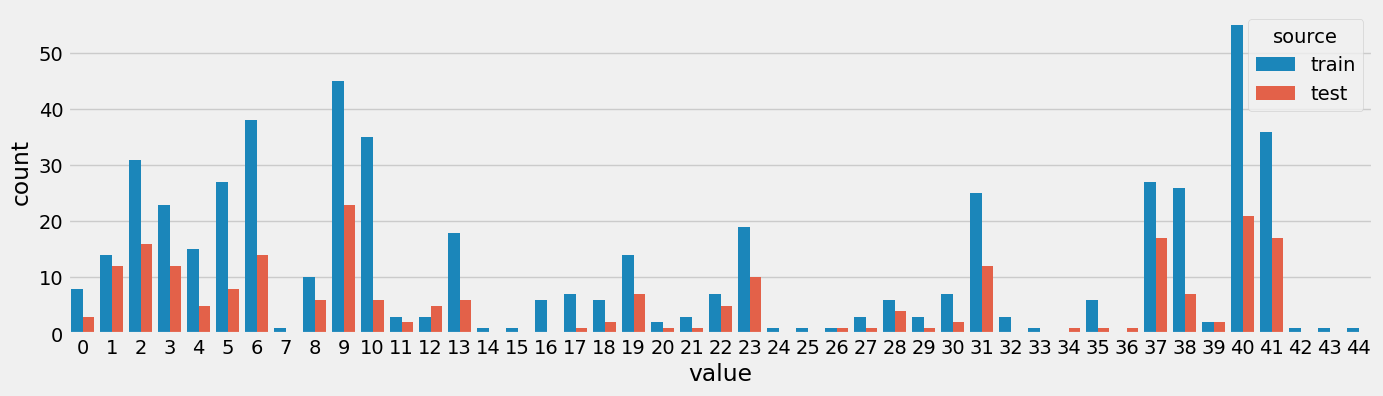

In [131]:

data_long = pd.melt(data, id_vars=['source'], value_vars=[col])

# Create the countplot
sns.countplot(x='value', hue='source', data=data_long)

<Axes: xlabel='value', ylabel='count'>

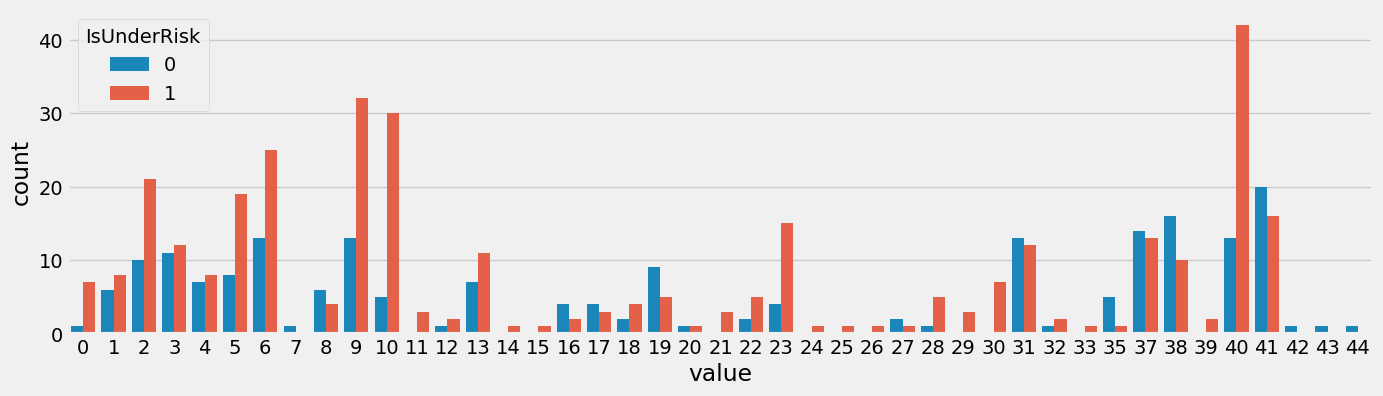

In [132]:
data_long = pd.melt(train, id_vars=['IsUnderRisk'], value_vars=[col])
sns.countplot(x='value', hue='IsUnderRisk', data=data_long)

Location_Score

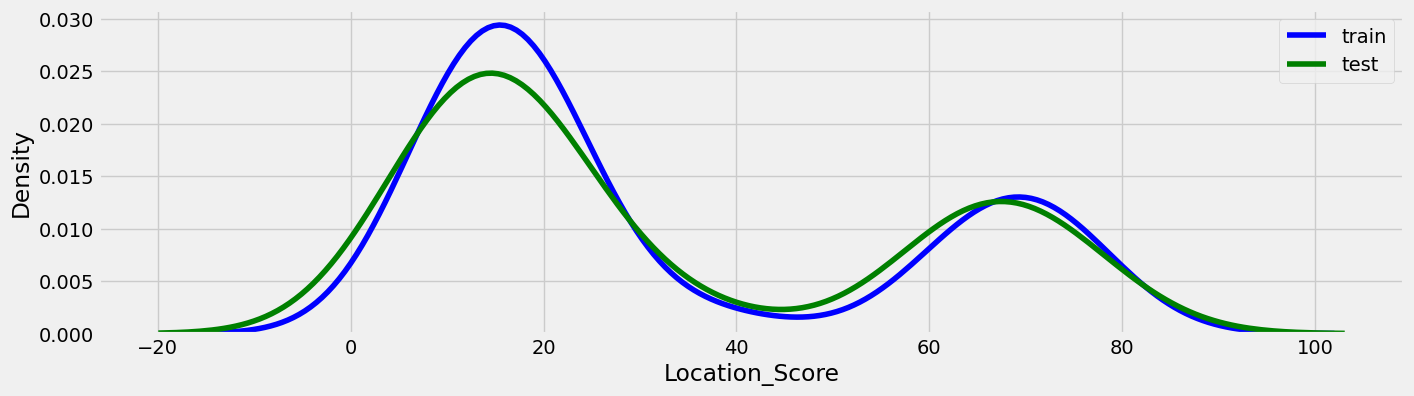

In [133]:
col = 'Location_Score'

plt.figure()
sns.distplot(train[col], color='b', label='train', hist=False)
sns.distplot(test[col], color='g', label='test', hist=False)
plt.legend(loc='best')
plt.show()

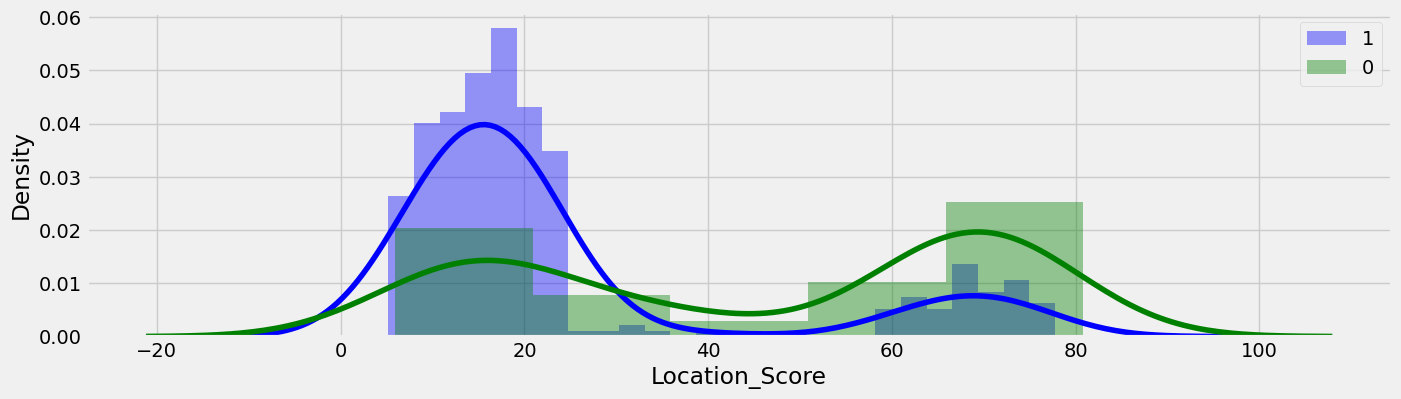

In [134]:
plt.figure()
sns.distplot(train[col][train[target] == 1], color='b', label='1') # , hist=False
sns.distplot(train[col][train[target] == 0], color='g', label='0') # , hist=False
plt.legend(loc='best')
plt.show()

Internal_Audit_Score


In [135]:
col = "Internal_Audit_Score"

print("Train Unique : {}\nTest Unique :  {}\nTest - Train : {} -- [{}]".format(
    train[col].nunique(), test[col].nunique(),
    len(set(test[col].unique()) - set(train[col].unique())), set(test[col].unique()) - set(train[col].unique())
))

Train Unique : 13
Test Unique :  13
Test - Train : 0 -- [set()]


<Axes: xlabel='value', ylabel='count'>

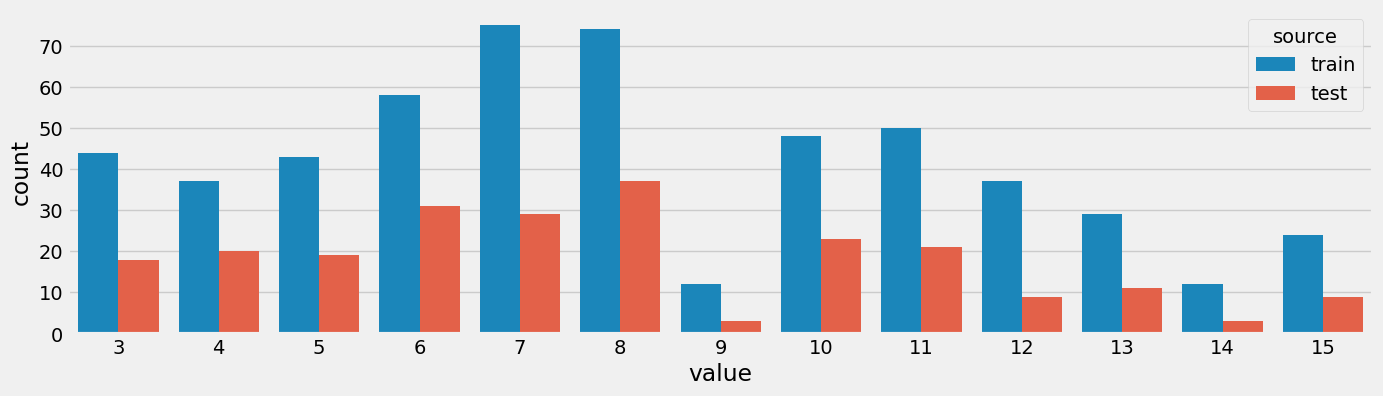

In [136]:

data_long = pd.melt(data, id_vars=['source'], value_vars=[col])

# Create the countplot
sns.countplot(x='value', hue='source', data=data_long)

<Axes: xlabel='value', ylabel='count'>

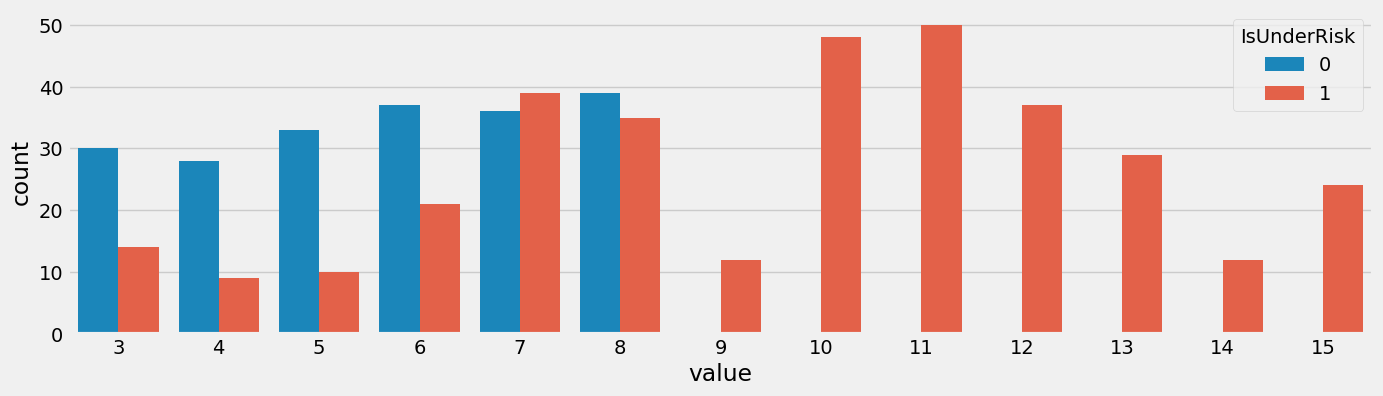

In [137]:
data_long = pd.melt(train, id_vars=['IsUnderRisk'], value_vars=[col])
sns.countplot(x='value', hue='IsUnderRisk', data=data_long)

array([[<Axes: title={'center': 'Internal_Audit_Score'}, xlabel='IsUnderRisk'>,
        <Axes: title={'center': 'External_Audit_Score'}, xlabel='IsUnderRisk'>],
       [<Axes: title={'center': 'Fin_Score'}, xlabel='IsUnderRisk'>,
        <Axes: title={'center': 'Loss_score'}, xlabel='IsUnderRisk'>]],
      dtype=object)

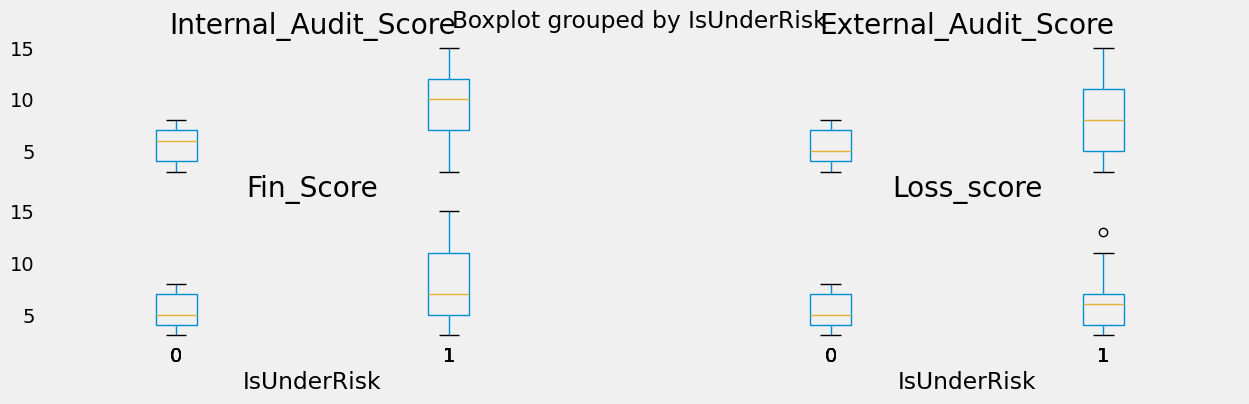

In [138]:
train.boxplot(by ='IsUnderRisk', column =['Internal_Audit_Score','External_Audit_Score',
                                          'Fin_Score','Loss_score'], grid = False)

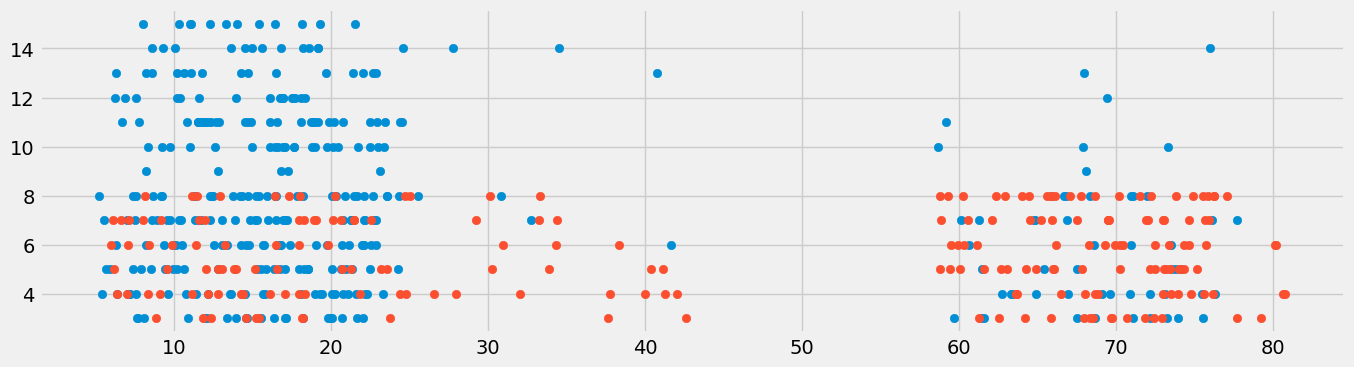

In [139]:
b = train.loc[train['IsUnderRisk']==1,]
c = train.loc[train['IsUnderRisk']==0,]
plt.scatter(b['Location_Score'],b['Fin_Score'])
plt.scatter(c['Location_Score'],c['Fin_Score'])

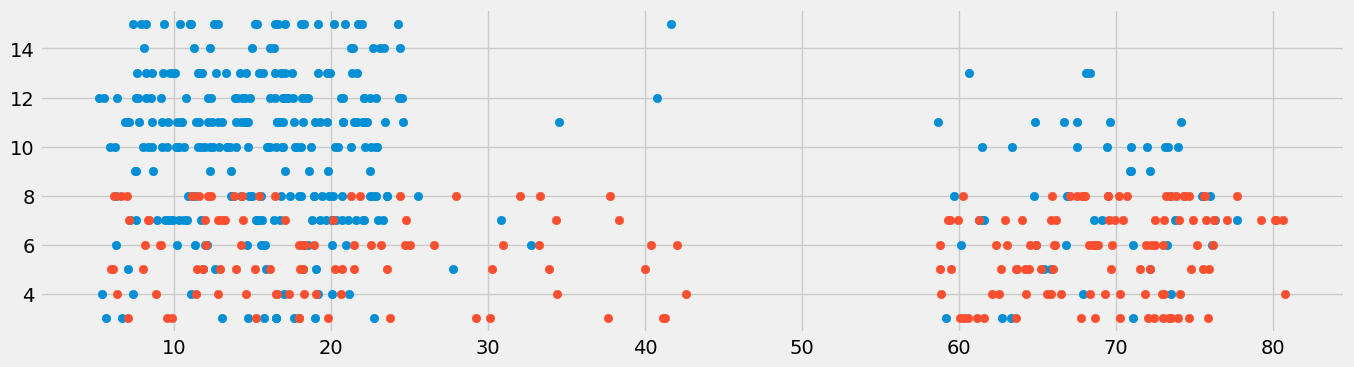

In [140]:
plt.scatter(b['Location_Score'],b['Internal_Audit_Score'])
plt.scatter(c['Location_Score'],c['Internal_Audit_Score'])

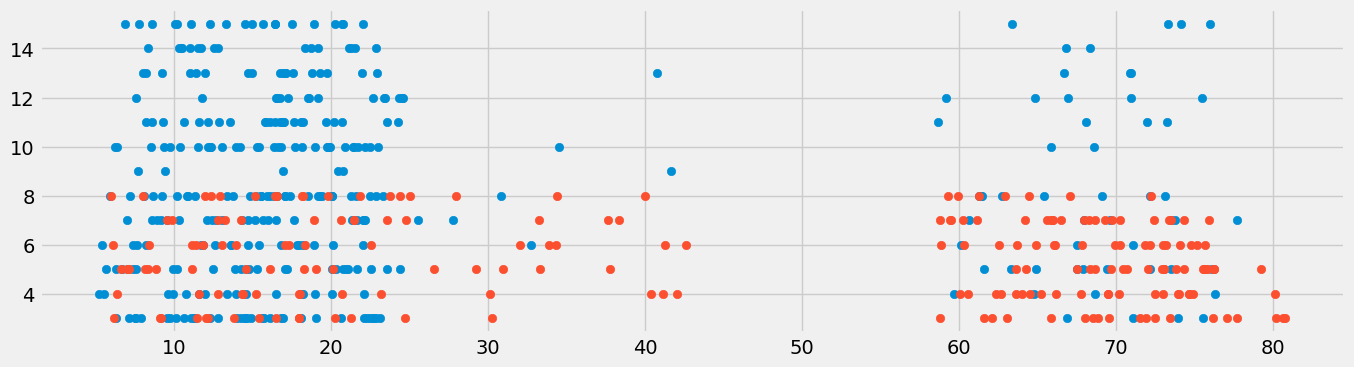

In [141]:
plt.scatter(b['Location_Score'],b['External_Audit_Score'])
plt.scatter(c['Location_Score'],c['External_Audit_Score'])

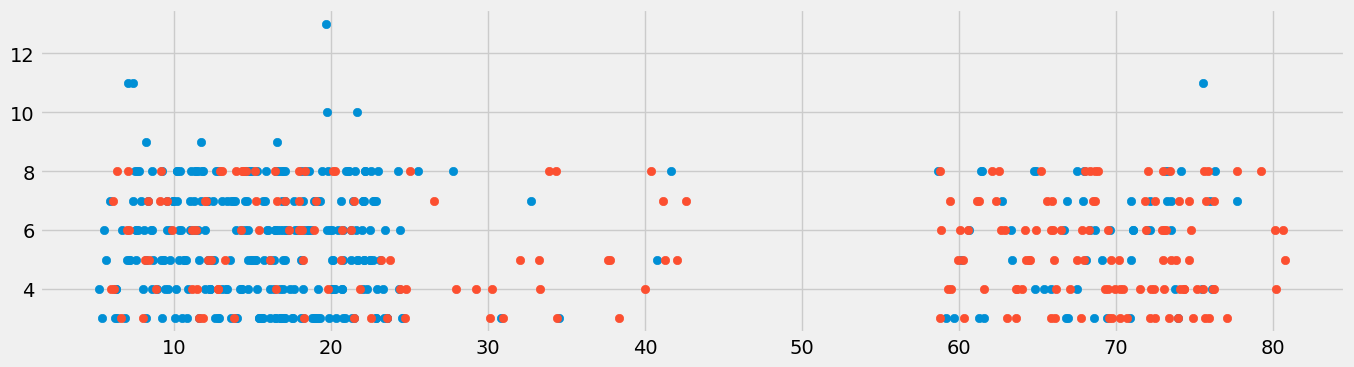

In [142]:
plt.scatter(b['Location_Score'],b['Loss_score'])
plt.scatter(c['Location_Score'],c['Loss_score'])

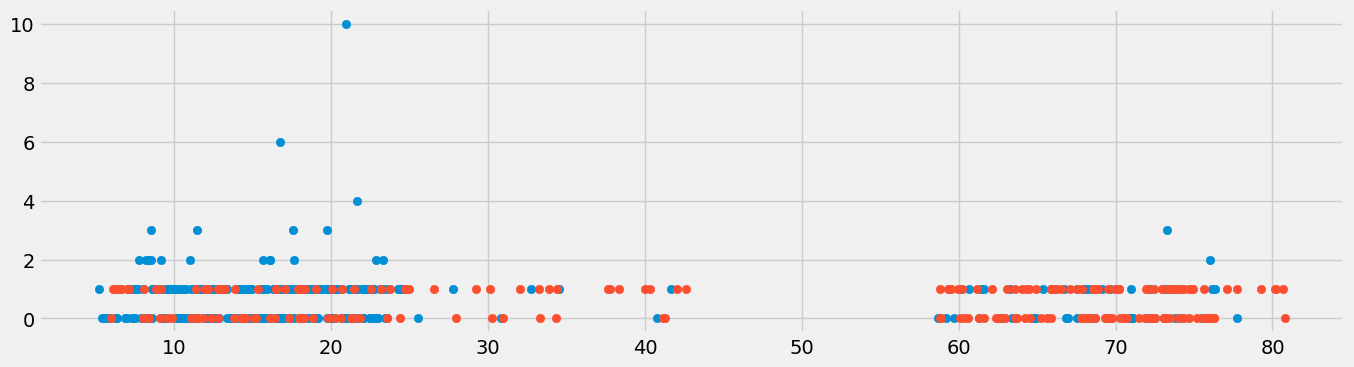

In [143]:
plt.scatter(b['Location_Score'],b['Past_Results'])
plt.scatter(c['Location_Score'],c['Past_Results'])

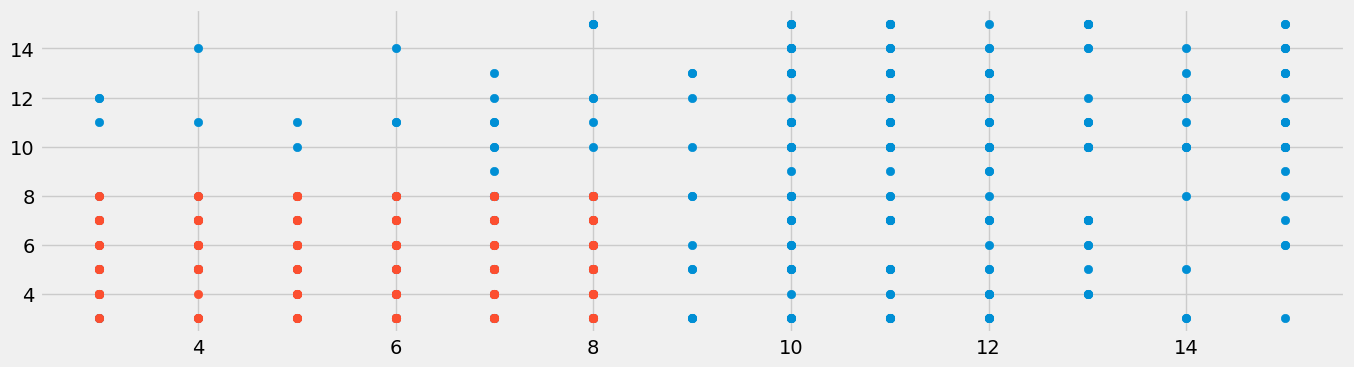

In [144]:
plt.scatter(b['Internal_Audit_Score'],b['External_Audit_Score'])
plt.scatter(c['Internal_Audit_Score'],c['External_Audit_Score'])

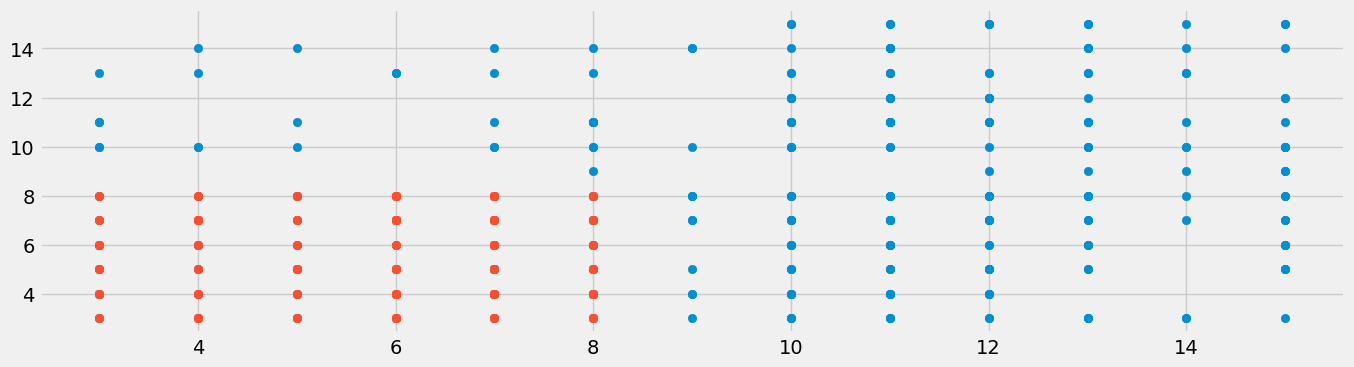

In [145]:
plt.scatter(b['Internal_Audit_Score'],b['Fin_Score'])
plt.scatter(c['Internal_Audit_Score'],c['Fin_Score'])

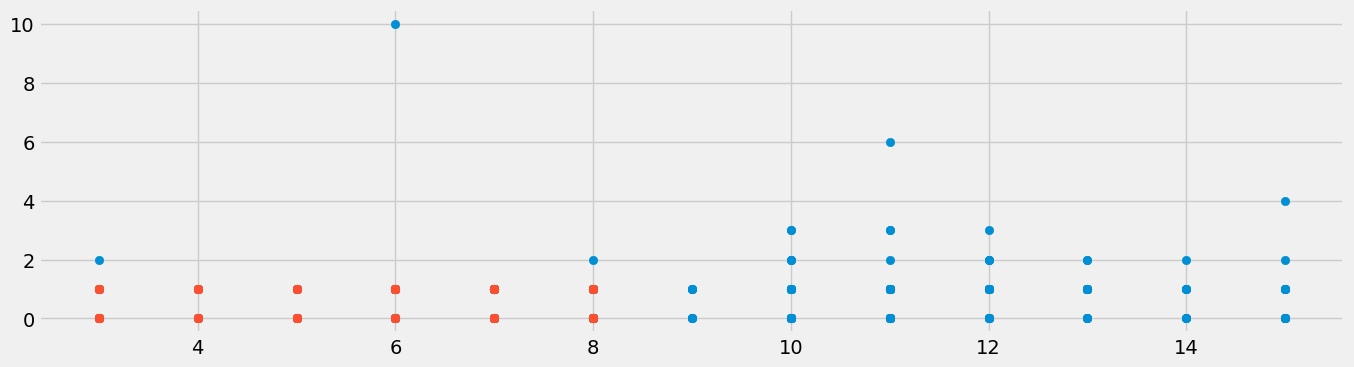

In [146]:
plt.scatter(b['Internal_Audit_Score'],b['Past_Results'])
plt.scatter(c['Internal_Audit_Score'],c['Past_Results'])

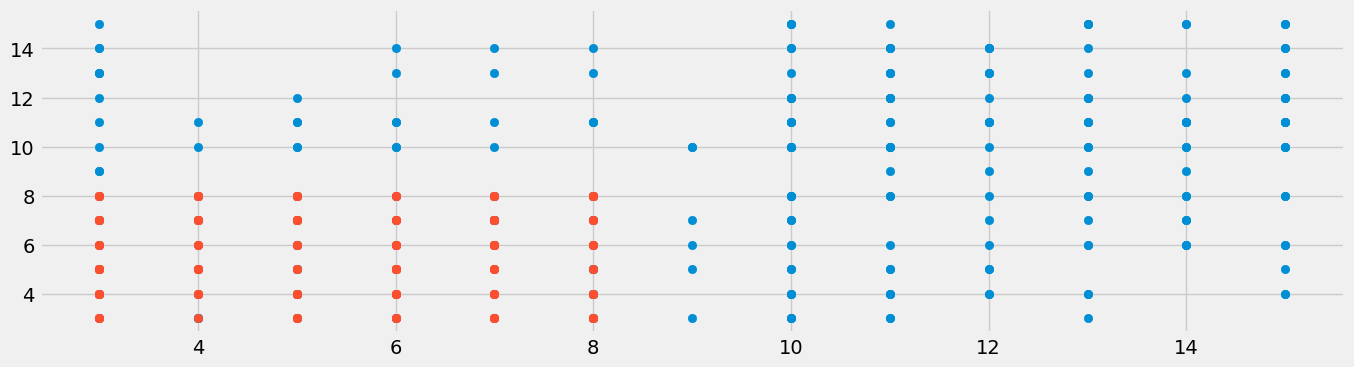

In [147]:
plt.scatter(b['External_Audit_Score'],b['Fin_Score'])
plt.scatter(c['External_Audit_Score'],c['Fin_Score'])

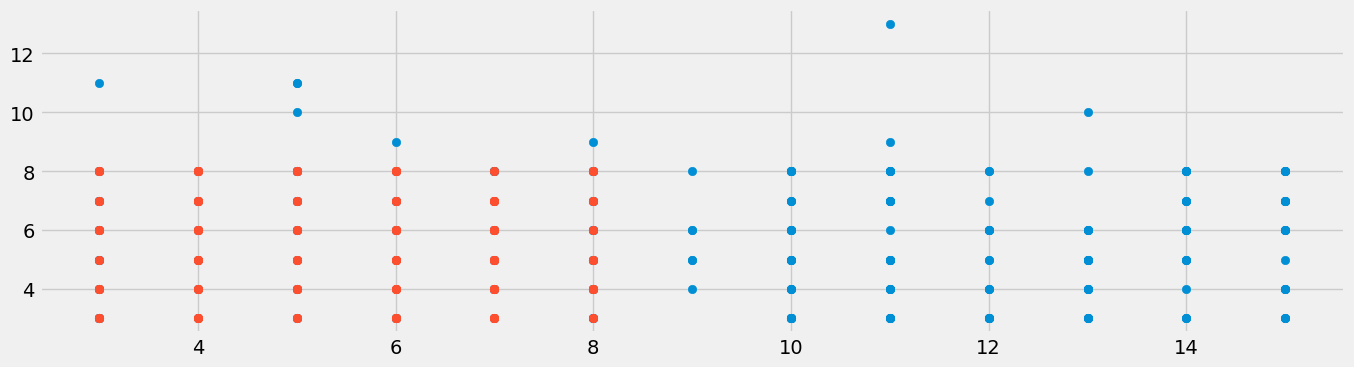

In [148]:
plt.scatter(b['External_Audit_Score'],b['Loss_score'])
plt.scatter(c['External_Audit_Score'],c['Loss_score'])

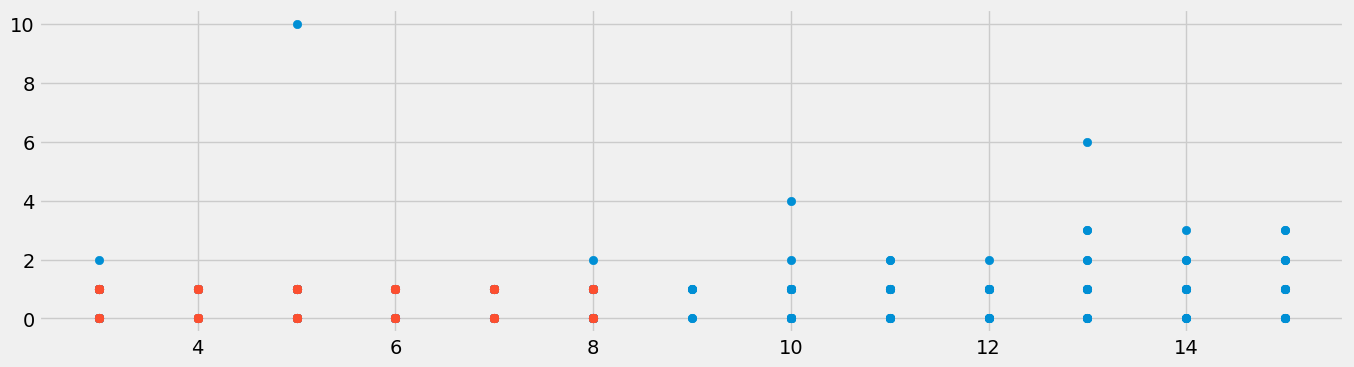

In [149]:
plt.scatter(b['External_Audit_Score'],b['Past_Results'])
plt.scatter(c['External_Audit_Score'],c['Past_Results'])

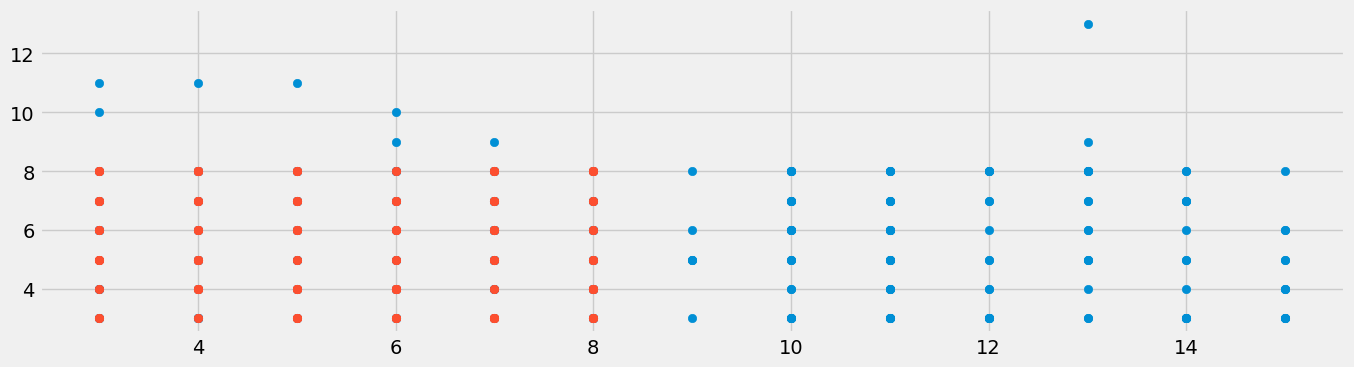

In [150]:
plt.scatter(b['Fin_Score'],b['Loss_score'])
plt.scatter(c['Fin_Score'],c['Loss_score'])

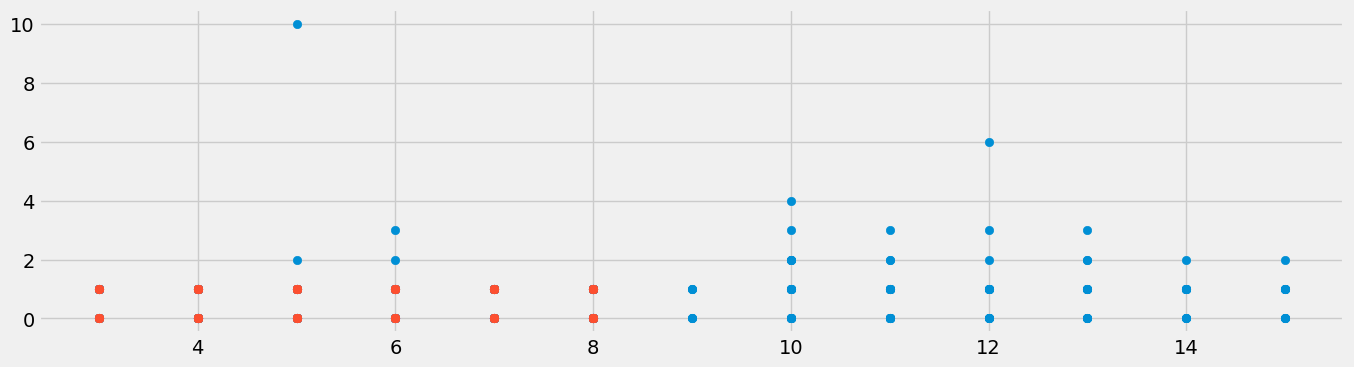

In [151]:
plt.scatter(b['Fin_Score'],b['Past_Results'])
plt.scatter(c['Fin_Score'],c['Past_Results'])

With these figures some of the patterns are identified and subsetting the data:
All Rules :

1.   Internal_Audit_Score >= 9 ==> Target = 1
2.   External_Audit_Score >= 9 ==> Target = 1
3.   Final_Score >= 9 ==> Target = 1
4.   Loss_score >= 9 ==> Target = 1
5.   Past_Results >= 2 ==> Target = 1


In [152]:
train_not_confirmed_result = train.loc[(train['Internal_Audit_Score']<9) & (train['External_Audit_Score']<9) &
                                   (train['Fin_Score']<9) & (train['Loss_score']<9) & (train['Past_Results']<2),]

In [153]:
train_not_confirmed_result.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,20.890071,41.635028,5.875887,5.514184,5.546099,5.429078,0.517730,0.280142
std,15.235236,26.445357,1.692201,1.712881,1.699802,1.701038,0.500574,0.449867
min,0.000000,5.363000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000
25%,6.000000,15.804750,5.000000,4.000000,4.000000,4.000000,0.000000,0.000000
50%,17.500000,34.117000,6.000000,5.000000,5.000000,5.000000,1.000000,0.000000
75%,38.000000,68.629500,7.000000,7.000000,7.000000,7.000000,1.000000,1.000000
max,44.000000,80.809000,8.000000,8.000000,8.000000,8.000000,1.000000,1.000000


In [154]:
#Remaining data is known to be sure Risk case:
train_confirmed_result = train.loc[~train.index.isin(train_not_confirmed_result.index),]

In [155]:
train_confirmed_result.describe()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,IsUnderRisk
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.0
mean,18.157088,22.129299,10.689655,9.287356,8.666667,5.639847,0.716475,1.0
std,14.039307,18.356635,2.773405,3.772088,3.546396,1.974984,0.962807,0.0
min,0.000000,5.185000,3.000000,3.000000,3.000000,3.000000,0.000000,1.0
25%,6.000000,11.759000,10.000000,6.000000,6.000000,4.000000,0.000000,1.0
50%,13.000000,16.789000,11.000000,10.000000,8.000000,6.000000,1.000000,1.0
75%,31.000000,21.531000,12.000000,12.000000,11.000000,7.000000,1.000000,1.0
max,41.000000,76.010000,15.000000,15.000000,15.000000,13.000000,10.000000,1.0


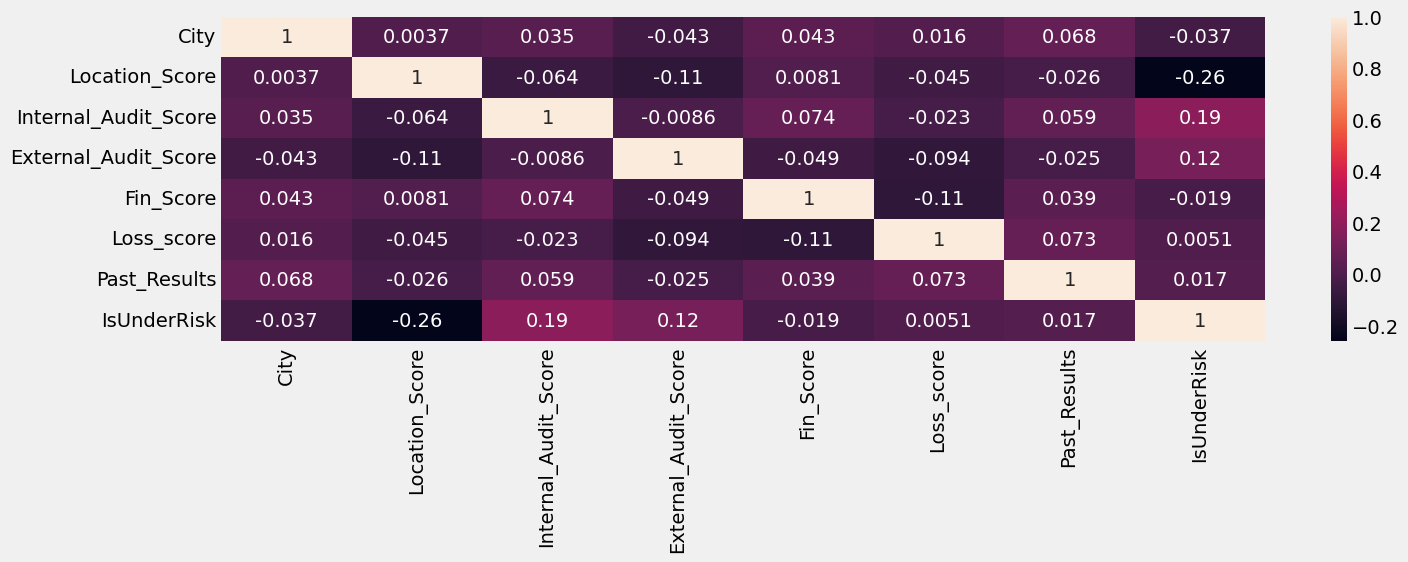

In [156]:
import matplotlib.pyplot as plt
corr = train_not_confirmed_result.corr()
sn.heatmap(corr, annot=True)
plt.show()

In [157]:
train_not_confirmed_result['IsUnderRisk'].value_counts()

IsUnderRisk
0    203
1     79
Name: count, dtype: int64

In [158]:
train_not_confirmed_result['IsUnderRisk'].value_counts([0]) #On seeing this the dataset is imbalanced

IsUnderRisk
0    0.719858
1    0.280142
Name: proportion, dtype: float64

**Checking the coverage i.e how much percentage of our rules cover the data.**

In [159]:
print("Train Coverage : {:.2f}%".format((train[
    (train['Internal_Audit_Score'] >= 9) |
    (train['External_Audit_Score'] >= 9) |
    (train['Fin_Score'] >= 9) |
    (train['Loss_score'] >= 9) |
    (train['Past_Results'] >= 2)
].shape[0] / train.shape[0]) * 100))

Train Coverage : 48.07%


In [160]:
print("Test Coverage : {:.2f}%".format((test[
    (test['Internal_Audit_Score'] >= 9) |
    (test['External_Audit_Score'] >= 9) |
    (test['Fin_Score'] >= 9) |
    (test['Loss_score'] >= 9) |
    (test['Past_Results'] >= 2)
].shape[0] / test.shape[0]) * 100))

Test Coverage : 47.64%


In [161]:
X = train_not_confirmed_result.drop(['IsUnderRisk'],axis=1)
Y = train_not_confirmed_result['IsUnderRisk']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [162]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [163]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,log_loss

print(confusion_matrix(y_test,y_pred))


[[35  1]
 [12  9]]


In [164]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.97      0.84        36
           1       0.90      0.43      0.58        21

    accuracy                           0.77        57
   macro avg       0.82      0.70      0.71        57
weighted avg       0.80      0.77      0.75        57



In [165]:
print(accuracy_score(y_test, y_pred))

0.7719298245614035


In [166]:
test["index"] = test.index
#Rule which is identified from the data visualised pattern is implemented
test_not_confirmed_result = test.loc[(test['Internal_Audit_Score']<9) & (test['External_Audit_Score']<9) &
                                   (test['Fin_Score']<9) & (test['Loss_score']<9) & (test['Past_Results']<2),]
test_confirmed_result = test.loc[~test.index.isin(test_not_confirmed_result.index),]
test_pred_not_confirmed = classifier.predict_proba(test_not_confirmed_result.drop(["index"],axis=1))
test_pred_not_confirmed[0:2]

array([[0.855, 0.145],
       [0.351, 0.649]])

In [167]:
test_pred_not_confirmed = pd.DataFrame(test_pred_not_confirmed,columns=["0","1"])
df1 = test_not_confirmed_result
df2 = test_pred_not_confirmed
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

df = pd.concat( [df1, df2], axis=1)
#Rule which is identified from the data is implemented
test_confirmed_result["0"] = 0
test_confirmed_result["1"] = 1

In [168]:
test_final_results = pd.concat([df, test_confirmed_result], ignore_index=True) # Use concat to combine DataFrames
test_final_results = test_final_results.sort_values(by=['index'])
test_final_results.head()

,City,Location_Score,Internal_Audit_Score,External_Audit_Score,Fin_Score,Loss_score,Past_Results,index,0,1
122,41,18.272,13,12,9,7,0,0,0.000,1.000
123,17,64.799,6,10,7,4,1,1,0.000,1.000
0,31,68.890,3,3,7,8,0,2,0.855,0.145
124,3,16.492,15,10,7,4,1,3,0.000,1.000
1,9,17.178,7,3,8,3,1,4,0.351,0.649


In [169]:
final_submission = test_final_results[["0","1"]]
final_submission.head()

,0,1
122,0.000,1.000
123,0.000,1.000
0,0.855,0.145
124,0.000,1.000
1,0.351,0.649


In [170]:
final_submission.to_excel("submission_21.xlsx",index = False)